In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
469,470,326,114,4,4.0,3.5,9.16,1,0.86
23,24,334,119,5,5.0,4.5,9.70,1,0.95
12,13,328,112,4,4.0,4.5,9.10,1,0.78


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.shape

(500, 9)

In [9]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
df.drop(columns = ['Serial No.'], inplace = True)

In [19]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [35]:
X.shape


(500, 7)

In [36]:
y.shape

(500,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
X_train.shape

(400, 7)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [41]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [42]:
X_train_scale

array([[0.96      , 0.89285714, 0.75      , ..., 0.875     , 0.8525641 ,
        1.        ],
       [0.58      , 0.64285714, 0.5       , ..., 0.375     , 0.63782051,
        0.        ],
       [0.92      , 0.71428571, 1.        , ..., 1.        , 0.94871795,
        1.        ],
       ...,
       [0.        , 0.42857143, 0.75      , ..., 0.375     , 0.21153846,
        0.        ],
       [0.98      , 0.96428571, 1.        , ..., 0.75      , 0.92948718,
        0.        ],
       [0.64      , 0.64285714, 0.75      , ..., 1.        , 0.74679487,
        1.        ]])

In [53]:
model = Sequential()

In [54]:
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [58]:
history = model.fit(X_train_scale,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 20ms/step - loss: 0.4794 - val_loss: 0.4444
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4006 - val_loss: 0.3691
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.3297 - val_loss: 0.3005
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2651 - val_loss: 0.2375
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.2065 - val_loss: 0.1809
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1545 - val_loss: 0.1314
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 0.1090 - val_loss: 0.0892
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0712 - val_loss: 0.0551
Epoch 9/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.0325
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0268 - val_loss: 0.0218
Epoch 11/100
7/7 [==========

7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 85/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 86/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 87/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 88/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 89/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 90/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 91/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 92/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 93/100
7/7 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 94/100
7/7 [===============

In [59]:
y_pred = model.predict(X_test_scale)

4/4 [==============================] - 0s 2ms/step


In [60]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test,y_pred)

0.7180597286983036

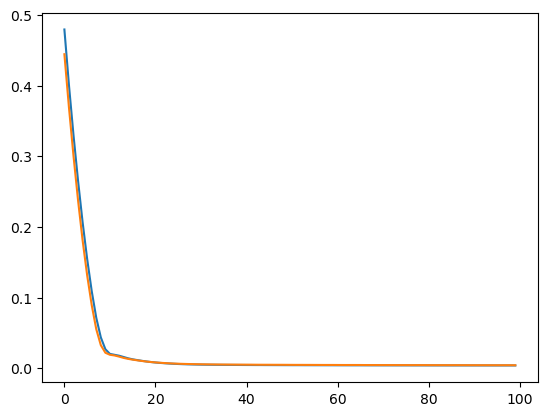

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])